# Handling Missing & Outliers
In this capture, handle missing values and handle outliers values. After and before, get the accuracy of model for understanding optimization. We use the linear regression model for testing.
## Configuration / Building Spark

In [1]:
from pyspark.sql import SparkSession, functions as F
import findspark

findspark.init("C:\Program Files\Spark\spark-3.3.1-bin-hadoop3")

In [2]:
spark = SparkSession.builder \
    .appName("House Price Model") \
    .master("local[2]") \
    .config("spark.sql.shuffle.partitions", "2") \
    .getOrCreate()

## Get Saved Operations

### Load Dataframe

In [3]:
path = "file:///Users/talha/OneDrive/Masaüstü/Talha Nebi Kumru/Data Science/Miuul/Machine Learning/House_Price_Prediction/datasets/eda/output/house.parquet"
df = spark.read \
    .format("parquet") \
    .option("header", True) \
    .option("inferSchema", True) \
    .load(path)

In [4]:
df.limit(5).toPandas()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


### Load Seperated Columns

In [5]:
import pickle

In [6]:
with open("datasets/eda/categorical_columns", "rb") as file:
    categorical_cols = pickle.load(file)

In [7]:
with open("datasets/eda/numerical_columns", "rb") as file:
    numerical_cols = pickle.load(file)

In [8]:
df.select(numerical_cols).dtypes

[('MSSubClass', 'int'),
 ('EnclosedPorch', 'int'),
 ('GrLivArea', 'int'),
 ('PoolArea', 'int'),
 ('OverallQual', 'int'),
 ('FullBath', 'int'),
 ('LotArea', 'int'),
 ('MoSold', 'int'),
 ('YearBuilt', 'int'),
 ('OpenPorchSF', 'int'),
 ('1stFlrSF', 'int'),
 ('OverallCond', 'int'),
 ('2ndFlrSF', 'int'),
 ('LowQualFinSF', 'int'),
 ('TotRmsAbvGrd', 'int'),
 ('YearRemodAdd', 'int'),
 ('WoodDeckSF', 'int'),
 ('Fireplaces', 'int'),
 ('BedroomAbvGr', 'int'),
 ('MiscVal', 'int'),
 ('HalfBath', 'int'),
 ('YrSold', 'int'),
 ('KitchenAbvGr', 'int'),
 ('3SsnPorch', 'int'),
 ('ScreenPorch', 'int'),
 ('SalePrice', 'int'),
 ('LotFrontage', 'int'),
 ('MasVnrArea', 'int'),
 ('BsmtFinSF1', 'int'),
 ('BsmtFinSF2', 'int'),
 ('BsmtUnfSF', 'int'),
 ('TotalBsmtSF', 'int'),
 ('BsmtFullBath', 'int'),
 ('BsmtHalfBath', 'int'),
 ('GarageCars', 'int'),
 ('GarageArea', 'int'),
 ('GarageYrBlt', 'int')]

In [9]:
numerical_cols = [col for col in numerical_cols if col != 'SalePrice']
categorical_cols = [col for col in categorical_cols
                    if col not in ['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu']] # I forgot it

In [10]:
df.select(categorical_cols).dtypes

[('MSZoning', 'string'),
 ('Street', 'string'),
 ('LotShape', 'string'),
 ('LandContour', 'string'),
 ('Utilities', 'string'),
 ('LotConfig', 'string'),
 ('LandSlope', 'string'),
 ('Neighborhood', 'string'),
 ('Condition1', 'string'),
 ('Condition2', 'string'),
 ('BldgType', 'string'),
 ('HouseStyle', 'string'),
 ('RoofStyle', 'string'),
 ('RoofMatl', 'string'),
 ('Exterior1st', 'string'),
 ('Exterior2nd', 'string'),
 ('MasVnrType', 'string'),
 ('ExterQual', 'string'),
 ('ExterCond', 'string'),
 ('Foundation', 'string'),
 ('BsmtQual', 'string'),
 ('BsmtCond', 'string'),
 ('BsmtExposure', 'string'),
 ('BsmtFinType1', 'string'),
 ('BsmtFinType2', 'string'),
 ('Heating', 'string'),
 ('HeatingQC', 'string'),
 ('CentralAir', 'string'),
 ('Electrical', 'string'),
 ('KitchenQual', 'string'),
 ('Functional', 'string'),
 ('GarageType', 'string'),
 ('GarageFinish', 'string'),
 ('GarageQual', 'string'),
 ('GarageCond', 'string'),
 ('PavedDrive', 'string'),
 ('SaleType', 'string'),
 ('SaleConditio

### Load Missing and Outliers

In [11]:
import json

In [12]:
with open("datasets/eda/missing_values.json") as file:
    missing_values = json.load(file)

In [13]:
with open("datasets/eda/outlier_values.json") as file:
    outlier_values = json.load(file)

### Configuration

In [14]:
from _missing_utils import replace_null

df = replace_null(df)

## Test Dataset

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score

In [16]:
from _missing_utils import remove_missing_values

non_missing_target_df = df.toPandas().dropna()
non_missing_target_df = pd.get_dummies(non_missing_target_df, drop_first=True)

X = non_missing_target_df.drop('SalePrice', axis=1)
y = non_missing_target_df[['SalePrice']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [17]:
reg_model = LinearRegression().fit(X_train, y_train)

In [18]:
y_pred = reg_model.predict(X_train)

In [19]:
reg_model.score(X_test, y_test) # R-square

0.5709561893035657

As we see, before the handling missing values and outliers, r2 score is **0.5709**.

## Missing Values

In [20]:
df.count()

2919

In [21]:
for miss in missing_values:
    print(missing_values.get(miss))

{'column_name': 'MSZoning', 'null_count': 4, 'ratio': 0.1370332305584104}
{'column_name': 'LotFrontage', 'null_count': 486, 'ratio': 16.649537512846866}
{'column_name': 'Utilities', 'null_count': 2, 'ratio': 0.0685166152792052}
{'column_name': 'Exterior1st', 'null_count': 1, 'ratio': 0.0342583076396026}
{'column_name': 'Exterior2nd', 'null_count': 1, 'ratio': 0.0342583076396026}
{'column_name': 'MasVnrType', 'null_count': 24, 'ratio': 0.8221993833504625}
{'column_name': 'MasVnrArea', 'null_count': 23, 'ratio': 0.7879410757108599}
{'column_name': 'BsmtQual', 'null_count': 81, 'ratio': 2.774922918807811}
{'column_name': 'BsmtCond', 'null_count': 82, 'ratio': 2.8091812264474134}
{'column_name': 'BsmtExposure', 'null_count': 82, 'ratio': 2.8091812264474134}
{'column_name': 'BsmtFinType1', 'null_count': 79, 'ratio': 2.7064063035286057}
{'column_name': 'BsmtFinSF1', 'null_count': 1, 'ratio': 0.0342583076396026}
{'column_name': 'BsmtFinType2', 'null_count': 80, 'ratio': 2.7406646111682083}
{'

Own method is for missing values;
* Delete missing values if ratio lower than %1.
* Fill missing values with median or mean if ratio lower than %10.
* Fill missing values with KNN imputer if ratio higher than %10.

In [22]:
delete_list = [missing_values.get(index)['column_name'] for index in missing_values 
               if missing_values.get(index)['ratio'] <= 1]

In [23]:
median_mean_list = [missing_values.get(index)['column_name'] for index in missing_values 
                   if missing_values.get(index)['ratio'] > 1 and missing_values.get(index)['ratio'] <= 10]

In [24]:
knn_imputer_list = [missing_values.get(index)['column_name'] for index in missing_values 
                   if missing_values.get(index)['ratio'] > 10]

In [25]:
len(missing_values) == len(delete_list) + len(median_mean_list) + len(knn_imputer_list)

True

Seperation is done. Only have to remove *SalePrice* column from knn_imputer_list because it is target column.

In [26]:
knn_imputer_list = [col for col in knn_imputer_list if col != 'SalePrice']

### Deletion

In [27]:
from _eda_utils import check_missing_values
from _missing_utils import remove_missing_values

In [28]:
df = remove_missing_values(df, delete_list)

In [29]:
check_missing_values(df.select(delete_list))

2023-04-10 00:19:22,564 - logging_utils - DEBUG - check_missing_values executing...


In [30]:
df.count()

2882

Before the deletion dataset has 2919 rows but now datasets has 2882 rows.

### Filling Median or Mean or Mode

In [31]:
df.select(median_mean_list).dtypes

[('BsmtQual', 'string'),
 ('BsmtCond', 'string'),
 ('BsmtExposure', 'string'),
 ('BsmtFinType1', 'string'),
 ('BsmtFinType2', 'string'),
 ('GarageType', 'string'),
 ('GarageYrBlt', 'int'),
 ('GarageFinish', 'string'),
 ('GarageQual', 'string'),
 ('GarageCond', 'string')]

In [32]:
for index in missing_values:
    if missing_values.get(index)["column_name"] in median_mean_list:
        print(missing_values.get(index))

{'column_name': 'BsmtQual', 'null_count': 81, 'ratio': 2.774922918807811}
{'column_name': 'BsmtCond', 'null_count': 82, 'ratio': 2.8091812264474134}
{'column_name': 'BsmtExposure', 'null_count': 82, 'ratio': 2.8091812264474134}
{'column_name': 'BsmtFinType1', 'null_count': 79, 'ratio': 2.7064063035286057}
{'column_name': 'BsmtFinType2', 'null_count': 80, 'ratio': 2.7406646111682083}
{'column_name': 'GarageType', 'null_count': 157, 'ratio': 5.378554299417608}
{'column_name': 'GarageYrBlt', 'null_count': 159, 'ratio': 5.4470709146968135}
{'column_name': 'GarageFinish', 'null_count': 159, 'ratio': 5.4470709146968135}
{'column_name': 'GarageQual', 'null_count': 159, 'ratio': 5.4470709146968135}
{'column_name': 'GarageCond', 'null_count': 159, 'ratio': 5.4470709146968135}


#### String Variables

In [33]:
mode_list = [col for col, _type in df.select(median_mean_list).dtypes if _type == 'string']

In [34]:
median_mean_list = [col for col in median_mean_list if col not in mode_list]

In [35]:
from _missing_utils import fill_cat_with_mode

In [36]:
df = fill_cat_with_mode(df, mode_list)

In [37]:
check_missing_values(df.select(mode_list))

2023-04-10 00:19:41,877 - logging_utils - DEBUG - check_missing_values executing...


#### Integer Variables

In [38]:
from _missing_utils import fill_num_with_mode

In [39]:
df  = fill_num_with_mode(df, columns=median_mean_list)

In [40]:
check_missing_values(df.select(median_mean_list))

2023-04-10 00:19:48,908 - logging_utils - DEBUG - check_missing_values executing...


### KNN Imputer

In [41]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import RobustScaler

In [42]:
knn_df = df.toPandas()

In [43]:
knn_df = knn_df[~knn_df['SalePrice'].isnull()]

In [44]:
encoder = pd.get_dummies(knn_df, drop_first=True)

In [45]:
scale = RobustScaler()
scaler = pd.DataFrame(scale.fit_transform(encoder), columns=encoder.columns)

In [46]:
imputer = pd.DataFrame(KNNImputer(n_neighbors=5).fit_transform(scaler), columns=scaler.columns)

In [47]:
final = pd.DataFrame(scale.inverse_transform(imputer), columns=imputer.columns)

#### Control

In [48]:
from _eda_utils import get_null_summary

In [49]:
control = get_null_summary(final)

2023-04-10 00:20:09,691 - logging_utils - DEBUG - get_null_summary executing...
2023-04-10 00:20:09,701 - logging_utils - INFO - 
                       null  not-null
MSSubClass                0      1451
LotFrontage               0      1451
LotArea                   0      1451
OverallQual               0      1451
OverallCond               0      1451
...                     ...       ...
SaleCondition_AdjLand     0      1451
SaleCondition_Alloca      0      1451
SaleCondition_Family      0      1451
SaleCondition_Normal      0      1451
SaleCondition_Partial     0      1451

[233 rows x 2 columns]


In [50]:
control['null'].max()

0

### Test Non-Missing

In [51]:
X = final.drop('SalePrice', axis=1)
y = final[['SalePrice']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [52]:
reg_model = LinearRegression().fit(X_train, y_train)

y_pred = reg_model.predict(X_train)

reg_model.score(X_test, y_test) # R-square

0.656871453071109

In [53]:
len(knn_df.columns) == len(final.columns)

False

In [54]:
knn_df[numerical_cols] = final[numerical_cols]

In [55]:
final = knn_df

In [61]:
list(df.columns) == list(knn_df.columns)

True

### Save

In [62]:
final.to_parquet("datasets/missing/non_missing.parquet")

### Conclusion

<div class="alert alert-block alert-info"> <b>Final:</b> After handle the missing values, accuracy increased <b>0.5709561893035657<b> to <b>0.656871453071109<b> </div>

## Outliers

In [63]:
from _eda_utils import check_outlier_values, seperate_columns
import warnings

warnings.filterwarnings('ignore')

In [64]:
path = "file:///Users/talha/OneDrive/Masaüstü/Talha Nebi Kumru/Data Science/Miuul/Machine Learning/House_Price_Prediction/datasets/missing/non_missing.parquet"
df = spark.read \
    .format("parquet") \
    .option("header", True) \
    .option("inferSchema", True) \
    .load(path)

In [65]:
df.limit(5).toPandas()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,__index_level_0__
0,60.0,RL,65.0,8450.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7.0,5.0,2003.0,2003.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856.0,854.0,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,Gd,8.0,Typ,0.0,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,WD,Normal,208500.0,0
1,20.0,RL,80.0,9600.0,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6.0,8.0,1976.0,1976.0,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262.0,0.0,0.0,1262.0,0.0,1.0,2.0,0.0,3.0,1.0,TA,6.0,Typ,1.0,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,WD,Normal,181500.0,1
2,60.0,RL,68.0,11250.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7.0,5.0,2001.0,2002.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920.0,866.0,0.0,1786.0,1.0,0.0,2.0,1.0,3.0,1.0,Gd,6.0,Typ,1.0,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,WD,Normal,223500.0,2
3,70.0,RL,60.0,9550.0,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7.0,5.0,1915.0,1970.0,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961.0,756.0,0.0,1717.0,1.0,0.0,1.0,0.0,3.0,1.0,Gd,7.0,Typ,1.0,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,WD,Abnorml,140000.0,3
4,60.0,RL,84.0,14260.0,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8.0,5.0,2000.0,2000.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145.0,1053.0,0.0,2198.0,1.0,0.0,2.0,1.0,4.0,1.0,Gd,9.0,Typ,1.0,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,WD,Normal,250000.0,4


In [66]:
df = df.drop(df.columns[-1])

In [67]:
numerical_cols, categorical_cols = seperate_columns(spark, df.dtypes)

2023-04-10 00:23:22,323 - logging_utils - DEBUG - seperate_columns function executing...
2023-04-10 00:23:22,324 - logging_utils - INFO - 
Numerical Columns: ['MSSubClass', 'MoSold', 'ScreenPorch', 'LotArea', 'GarageArea', 'OverallCond', 'HalfBath', '2ndFlrSF', 'EnclosedPorch', 'MiscVal', 'MasVnrArea', 'PoolArea', 'YrSold', 'Fireplaces', 'OverallQual', 'WoodDeckSF', 'LowQualFinSF', 'BedroomAbvGr', 'YearBuilt', 'BsmtFullBath', 'GarageCars', 'BsmtUnfSF', 'OpenPorchSF', 'LotFrontage', 'BsmtHalfBath', 'GrLivArea', 'KitchenAbvGr', 'TotRmsAbvGrd', 'YearRemodAdd', 'GarageYrBlt', 'SalePrice', '1stFlrSF', '3SsnPorch', 'BsmtFinSF1', 'BsmtFinSF2', 'FullBath', 'TotalBsmtSF']
2023-04-10 00:23:22,325 - logging_utils - INFO - 
Categorical Columns: ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Fo

In [68]:
outliers = check_outlier_values(df, numerical_cols)

2023-04-10 00:23:24,462 - logging_utils - DEBUG - check_outlier_values executing...
2023-04-10 00:23:24,717 - logging_utils - INFO - LotArea has 4 - %  0.28 outliers count.
2023-04-10 00:23:25,084 - logging_utils - INFO - MiscVal has 8 - %  0.55 outliers count.
2023-04-10 00:23:25,211 - logging_utils - INFO - PoolArea has 7 - %  0.48 outliers count.
2023-04-10 00:23:26,387 - logging_utils - INFO - 3SsnPorch has 1 - %  0.07 outliers count.
2023-04-10 00:23:26,441 - logging_utils - INFO - BsmtFinSF1 has 1 - %  0.07 outliers count.
2023-04-10 00:23:26,584 - logging_utils - INFO - TotalBsmtSF has 1 - %  0.07 outliers count.


Outliers are under the **%1**. This means we can replace outliers with up limit and low limit threshold. I use up limit threshold as *%99* and low limit threshold as *%1*.

### Replace Outliers with Columns Thresholds

In [69]:
for out in outliers:
    print(outliers.get(out))

{'column_name': 'LotArea', 'outlier_count': 4, 'up_limit': 91985.0, 'low_limit': -52503.0, 'ratio': 0.2756719503790489}
{'column_name': 'MiscVal', 'outlier_count': 8, 'up_limit': 1750.0, 'low_limit': -1050.0, 'ratio': 0.5513439007580978}
{'column_name': 'PoolArea', 'outlier_count': 7, 'up_limit': 0.0, 'low_limit': 0.0, 'ratio': 0.4824259131633356}
{'column_name': '3SsnPorch', 'outlier_count': 1, 'up_limit': 420.0, 'low_limit': -252.0, 'ratio': 0.06891798759476223}
{'column_name': 'BsmtFinSF1', 'outlier_count': 1, 'up_limit': 3931.25, 'low_limit': -2358.75, 'ratio': 0.06891798759476223}
{'column_name': 'TotalBsmtSF', 'outlier_count': 1, 'up_limit': 5388.75, 'low_limit': -3233.25, 'ratio': 0.06891798759476223}


In [70]:
from _outliers_utils import replace_with_thresholds

In [71]:
for out in outliers:
    col_variable = outliers[out]
    df = replace_with_thresholds(df=df, col=col_variable['column_name'],
                                up_threshold=col_variable['up_limit'],
                                low_threshold=col_variable['low_limit'])

In [72]:
check_outlier_values(df, numerical_cols)

2023-04-10 00:23:33,703 - logging_utils - DEBUG - check_outlier_values executing...


{}

### Test Outliers

In [73]:
outlier_df = df.toPandas()
outlier_df = pd.get_dummies(outlier_df, drop_first=True)

In [74]:
X = outlier_df.drop('SalePrice', axis=1)
y = outlier_df[['SalePrice']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [75]:
reg_model = LinearRegression().fit(X_train, y_train)

y_pred = reg_model.predict(X_train)

reg_model.score(X_test, y_test) # R-square

0.6888786856405607

In [84]:
df = df.toPandas()

In [85]:
df[numerical_cols] = outlier_df[numerical_cols]

### Local Outliers

In [86]:
from sklearn.neighbors import LocalOutlierFactor

#### Preparation

In [87]:
numerical_cols = [col for col in numerical_cols if col != 'SalePrice']

In [88]:
local_df = df

In [89]:
local_df.shape[0] * 1 / 100

14.51

#### Create Model

In [90]:
clf = LocalOutlierFactor(n_neighbors=15)

In [91]:
clf.fit_predict(local_df[numerical_cols])

array([ 1,  1,  1, ..., -1,  1,  1])

In [92]:
scores = clf.negative_outlier_factor_

In [93]:
import numpy as np

In [94]:
plot_scores = pd.DataFrame(np.sort(scores))

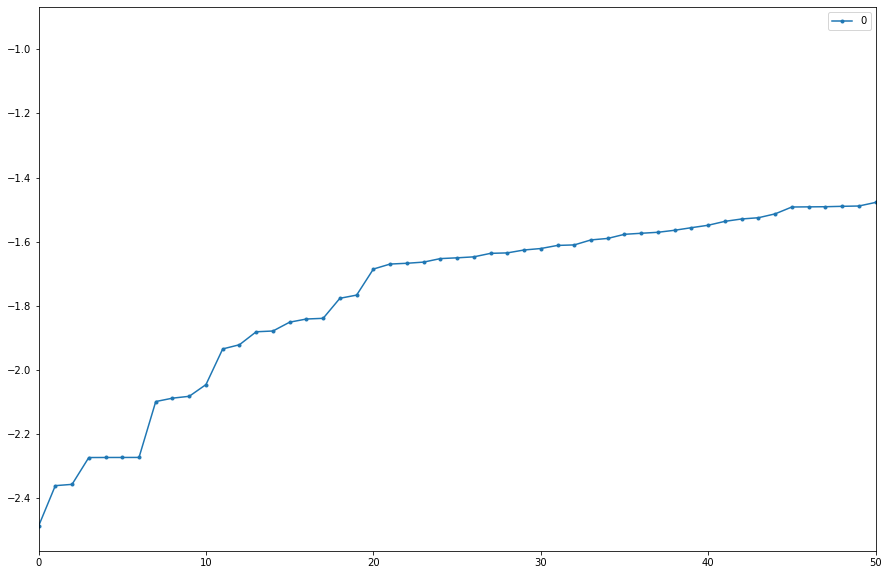

In [95]:
# %matplotlib qt
%matplotlib inline
plot_scores.plot(stacked=True, xlim=[0, 50], style='.-', figsize=(15, 10))
plt.show()

In [96]:
threshold = np.sort(scores)[5]

In [97]:
local_df[(scores < threshold)][numerical_cols]

,MSSubClass,MoSold,ScreenPorch,LotArea,GarageArea,OverallCond,HalfBath,2ndFlrSF,EnclosedPorch,MiscVal,MasVnrArea,PoolArea,YrSold,Fireplaces,OverallQual,WoodDeckSF,LowQualFinSF,BedroomAbvGr,YearBuilt,BsmtFullBath,GarageCars,BsmtUnfSF,OpenPorchSF,LotFrontage,BsmtHalfBath,GrLivArea,KitchenAbvGr,TotRmsAbvGrd,YearRemodAdd,GarageYrBlt,1stFlrSF,3SsnPorch,BsmtFinSF1,BsmtFinSF2,FullBath,TotalBsmtSF
312,20.0,6.0,0.0,91985.0,513.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,2009.0,2.0,7.0,0.0,0.0,3.0,1965.0,2.0,2.0,8.000000e+01,0.0,150.0,0.0,2036.0,1.0,8.0,1965.0,1965.0,2036.0,0.0,1.236000e+03,820.0,2.0,2136.0
334,190.0,8.0,0.0,91985.0,529.0,6.0,0.0,167.0,0.0,700.0,0.0,0.0,2008.0,2.0,5.0,670.0,0.0,3.0,1965.0,2.0,2.0,1.030000e+02,0.0,78.6,0.0,1786.0,1.0,7.0,1965.0,1965.0,1619.0,0.0,1.249000e+03,147.0,2.0,1499.0
702,190.0,7.0,0.0,5600.0,0.0,5.0,0.0,720.0,0.0,1750.0,0.0,0.0,2010.0,0.0,4.0,0.0,0.0,3.0,1930.0,0.0,0.0,5.684342e-14,0.0,70.0,0.0,1092.0,2.0,7.0,1950.0,1979.0,372.0,0.0,5.684342e-14,0.0,2.0,0.0
887,50.0,7.0,0.0,8064.0,576.0,7.0,0.0,252.0,0.0,1750.0,0.0,0.0,2007.0,1.0,5.0,0.0,0.0,3.0,1949.0,0.0,2.0,6.720000e+02,0.0,60.0,0.0,924.0,1.0,6.0,2006.0,2003.0,672.0,0.0,5.684342e-14,0.0,1.0,672.0
1448,70.0,5.0,0.0,9042.0,252.0,9.0,0.0,1152.0,0.0,1750.0,0.0,0.0,2010.0,2.0,7.0,0.0,0.0,4.0,1941.0,0.0,1.0,8.770000e+02,60.0,66.0,0.0,2340.0,1.0,9.0,2006.0,1941.0,1188.0,0.0,2.750000e+02,0.0,2.0,1152.0


In [98]:
non_local_outliers = local_df[~(scores < threshold)]

In [101]:
temp_df = non_local_outliers

#### Test Non Local Outliers

In [102]:
non_local_outliers = pd.get_dummies(non_local_outliers, drop_first=True)

In [103]:
X = non_local_outliers.drop('SalePrice', axis=1)
y = non_local_outliers[['SalePrice']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [104]:
reg_model = LinearRegression().fit(X_train, y_train)

y_pred = reg_model.predict(X_train)

reg_model.score(X_test, y_test) # R-square

0.9096735738461703

#### Save

In [105]:
df = temp_df

In [106]:
df.shape

(1446, 75)

In [108]:
df.to_parquet("datasets/outliers/non_outliers.parquet", index=False)

In [109]:
spark.stop()

### Conclusion

<div class="alert alert-block alert-info"> <b>Final:</b> After handle the outliers, accuracy increased <b>0.656871453071109<b> to <b>0.9096735738461703<b> </div>

## Final Conclusion

<div class="alert alert-block alert-info"> <b>Final:</b> After handle the missing values and outlier values, accuracy increased <b>0.5709561893035657<b> to <b>0.9096735738461703<b> </div>